In [1]:
from nmc_met_io.read_micaps import read_micaps_1

In [2]:
filename = "samples/micaps/surface_plot/20032714.000"

In [3]:
data = read_micaps_1(filename)

In [4]:
data

,ID,lon,lat,alt,grade,total_cloud_cover,wind_angle,wind_speed,MSLP,pressure_3h_trend,...,low_cloud_base,dewpoint,visibility,current_weather,temperature,middle_cloud_type,high_cloud_type,flag1,flag2,time
0,42295,88.26,27.05,2127.0,1,8.0,0,0,NaN,NaN,...,300.0,14.0,1.0,10,16.2,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
1,42299,88.61,27.33,1756.0,1,7.0,0,0,NaN,NaN,...,300.0,13.0,2.0,5,16.6,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
2,42500,87.46,25.26,NaN,1,0.0,0,0,1001.17,NaN,...,50.0,21.0,4.0,0,31.2,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
3,42503,88.13,25.03,26.0,1,0.0,230,0,1001.19,NaN,...,50.0,19.0,4.0,0,32.4,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
4,42807,88.33,22.53,5.0,1,0.0,360,2,1001.18,NaN,...,50.0,15.0,4.0,0,34.8,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,16564,9.51,39.10,116.0,1,7.0,270,12,1000.46,0.0,...,600.0,6.0,20.0,0,8.4,27.0,12.0,NaN,NaN,2020-03-27 14:00:00
6640,01009,88.51,12.01,NaN,1,NaN,30,4,NaN,NaN,...,NaN,NaN,NaN,0,27.9,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
6641,01009,65.10,15.14,NaN,1,NaN,0,0,1001.46,NaN,...,NaN,NaN,NaN,0,27.5,NaN,NaN,NaN,NaN,2020-03-27 14:00:00
6642,01009,0.01,0.00,NaN,1,NaN,215,2,NaN,NaN,...,NaN,NaN,NaN,0,28.6,NaN,NaN,NaN,NaN,2020-03-27 14:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6644 non-null   object        
 1   lon                6644 non-null   float64       
 2   lat                6644 non-null   float64       
 3   alt                6106 non-null   float64       
 4   grade              6644 non-null   int64         
 5   total_cloud_cover  3978 non-null   float64       
 6   wind_angle         6644 non-null   int64         
 7   wind_speed         6644 non-null   int64         
 8   MSLP               4570 non-null   float64       
 9   pressure_3h_trend  4454 non-null   float64       
 10  past_weather_1     6644 non-null   int64         
 11  past_weather_2     6644 non-null   int64         
 12  precipitation_6h   305 non-null    float64       
 13  low_cloud_type     1289 non-null   float64       
 14  low_clou

In [6]:
?read_micaps_1

In [19]:
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.plots import StationPlot, sky_cover
from metpy.units import units

from nmc_met_graphics.plot.china_map import add_china_map_2cartopy

In [9]:
# 将风、总云量缺测的观测去掉
data = data.dropna(how='any', subset=['total_cloud_cover', 'wind_angle', 'wind_speed'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3978 entries, 0 to 6639
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 3978 non-null   object        
 1   lon                3978 non-null   float64       
 2   lat                3978 non-null   float64       
 3   alt                3550 non-null   float64       
 4   grade              3978 non-null   int64         
 5   total_cloud_cover  3978 non-null   float64       
 6   wind_angle         3978 non-null   int64         
 7   wind_speed         3978 non-null   int64         
 8   MSLP               3649 non-null   float64       
 9   pressure_3h_trend  3439 non-null   float64       
 10  past_weather_1     3978 non-null   int64         
 11  past_weather_2     3978 non-null   int64         
 12  precipitation_6h   247 non-null    float64       
 13  low_cloud_type     1288 non-null   float64       
 14  low_clou

In [11]:
proj = ccrs.LambertConformal(central_longitude=100)
point_locs = proj.transform_points(ccrs.PlateCarree(), data['lon'].values, data['lat'].values)
data = data[mpcalc.reduce_point_density(point_locs, 80 * units.km)]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2472 entries, 0 to 6639
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2472 non-null   object        
 1   lon                2472 non-null   float64       
 2   lat                2472 non-null   float64       
 3   alt                2171 non-null   float64       
 4   grade              2472 non-null   int64         
 5   total_cloud_cover  2472 non-null   float64       
 6   wind_angle         2472 non-null   int64         
 7   wind_speed         2472 non-null   int64         
 8   MSLP               2304 non-null   float64       
 9   pressure_3h_trend  2109 non-null   float64       
 10  past_weather_1     2472 non-null   int64         
 11  past_weather_2     2472 non-null   int64         
 12  precipitation_6h   133 non-null    float64       
 13  low_cloud_type     887 non-null    float64       
 14  low_clou

In [14]:
data['temperature'].values

array([16.2, 31.2, 34.8, ..., 23.8, 10. ,  8.4])

In [17]:
temperature = data['temperature'].values * units.degC
dewpoint = data['dewpoint'].values * units.degC
pressure = data['MSLP'].values * units.hPa
cloud_coverage = np.array(data['total_cloud_cover'].values, dtype=int)
wind_speed = data['wind_speed'].values * units.meter_per_second
wind_direction = data['wind_angle'].values * units.deg
latitude = data['lat']
longitude = data['lon']

u, v = mpcalc.wind_components(wind_speed.to('knots'), wind_direction)

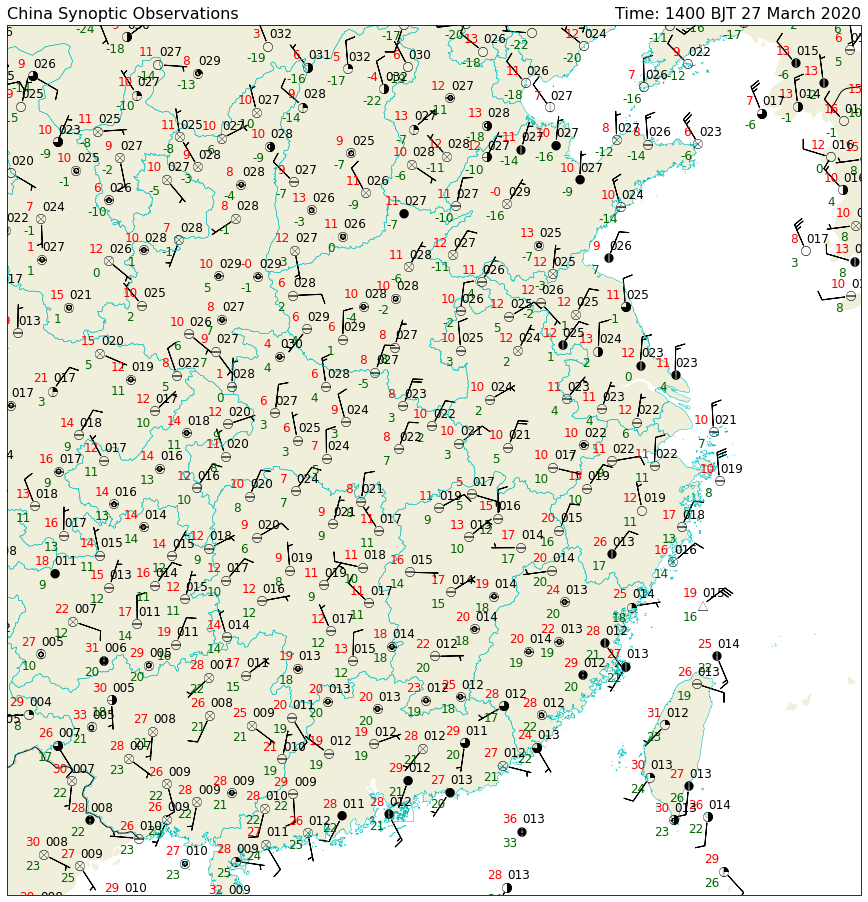

In [20]:
# Create the figure and an axes set to the projection.
proj = ccrs.LambertConformal(central_longitude=115)
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
add_china_map_2cartopy(ax, lw=0.5)

# Set plot bounds
ax.set_extent((105, 125, 20, 40))

stationplot = StationPlot(ax, longitude.values, latitude.values, clip_on=True,
                          transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', temperature, color='red')
stationplot.plot_parameter('SW', dewpoint, color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', pressure.m, formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', cloud_coverage, sky_cover, fontsize=10)

# Add wind barbs
stationplot.plot_barb(u, v, sizes={'emptybarb':0.1})

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and -1 in y.
#stationplot.plot_text((2, -1), station_id)

# Add title and display figure
plt.title('China Synoptic Observations', fontsize=16, loc='left')
plt.title('Time: 1400 BJT 27 March 2020', fontsize=16, loc='right')
plt.show()